Radius (R > 0): 2
Width (0 < W < 2R): 1
Approximate surface area: 12.650
Edge length: 12.692


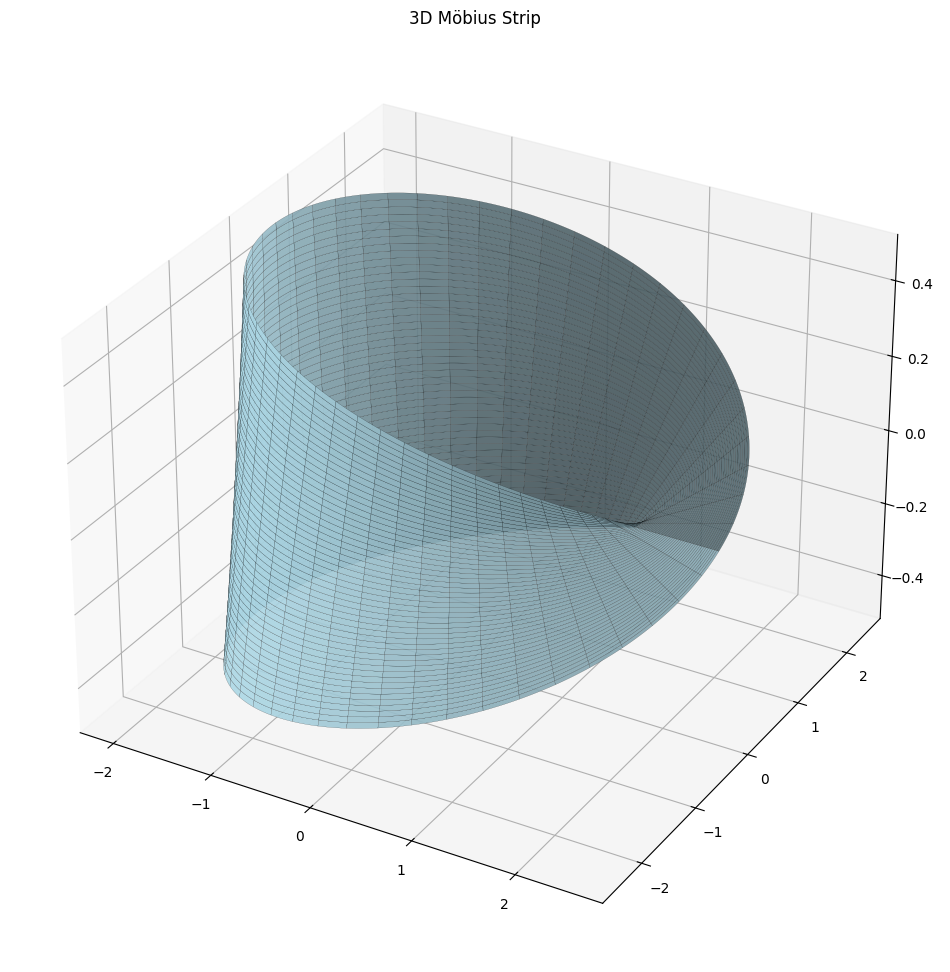

In [6]:
# Importing required libraries
import numpy as np
import matplotlib.pyplot as plt

class MobiusStrip:
    def __init__(self, radius, width, resolution):
        self.R = radius
        self.w = width
        self.n = resolution
        self.u_vals = np.linspace(0, 2 * np.pi, self.n)
        self.v_vals = np.linspace(-self.w / 2, self.w / 2, self.n)
        self.U, self.V = np.meshgrid(self.u_vals, self.v_vals)
        self.x_vals, self.y_vals, self.z_vals = self.generate_3Delemnts()

    def generate_3Delemnts(self):
        u, v = self.U, self.V
        r_offset = self.R + v * np.cos(u / 2)
        x = r_offset * np.cos(u)
        y = r_offset * np.sin(u)
        z = v * np.sin(u / 2)
        return x, y, z

    def surface_area(self):
        du = 2 * np.pi / (self.n - 1)
        dv = self.w / (self.n - 1)
        u, v = self.U, self.V
        radius_term = self.R + v * np.cos(u / 2)
        area_elements = np.sqrt(radius_term ** 2 + (v / 2) ** 2) * du * dv
        return np.sum(area_elements)

    def edge_length(self):
        # Calculate the length of the boundary curve
        u = self.u_vals
        v_edge = self.w / 2
        x = (self.R + v_edge * np.cos(u / 2)) * np.cos(u)
        y = (self.R + v_edge * np.cos(u / 2)) * np.sin(u)
        z = v_edge * np.sin(u / 2)

        dx, dy, dz = np.gradient(x), np.gradient(y), np.gradient(z)
        segment_lengths = np.sqrt(dx**2 + dy**2 + dz**2)
        return np.sum(segment_lengths)

    def plot(self):
        fig = plt.figure(figsize=(12, 101))
        ax = fig.add_subplot(111, projection='3d')
        ax.plot_surface(self.x_vals, self.y_vals, self.z_vals,
                        color='lightblue', edgecolor='k', linewidth=0.1, alpha=0.9)
        ax.set_title("3D Möbius Strip")
        return fig

# Get user input (assume valid input for brevity)
radius = float(input("Radius (R > 0): "))
width = float(input("Width (0 < W < 2R): "))

strip = MobiusStrip(radius, width, resolution=500)

area = strip.surface_area()
length = strip.edge_length()

print(f"length of Edge: {length:.3f}")

print(f"The surface area: {area:.3f}")


fig = strip.plot()
plt.show()



